#**Name :** Pawan Gosavi
#**Class :** FYBSc CS
#**Roll No. :** 01

# **APP - Practical No. 03**

## **Aim :** Write a Program to demonstrate concept of threading and multitasking in Python.

## **Multithreading**

### **Process**

  In computing, a process is an instance of a computer program that is being executed. Any process has 3 basic components:



*   An executable program.
*   The associated data needed by the program (variables, work space, buffers, etc.)
*   The execution context of the program (State of process)

### **Thread**

  A thread is an entity within a process that can be scheduled for execution. Also, it is the smallest unit of processing that can be performed in an OS (Operating System).

  In simple words, a thread is a sequence of such instructions within a program that can be executed independently of other code. For simplicity, you can assume that a thread is simply a subset of a process!

  A thread contains all this information in a Thread Control Block (TCB):

**Thread Identifier:** Unique id (TID) is assigned to every new thread

*   **Stack pointer:** Points to thread’s stack in the process. Stack contains the local variables under thread’s scope.

*   **Program counter:** a register which stores the address of the instruction currently being executed by thread.

*   **Thread state:** can be running, ready, waiting, start or done.

*   **Thread’s register set:** registers assigned to thread for computations.

*   **Parent process Pointer:** A pointer to the Process control block (PCB) of the process that the thread lives on.

Consider the diagram below to understand the relation between process and its thread:

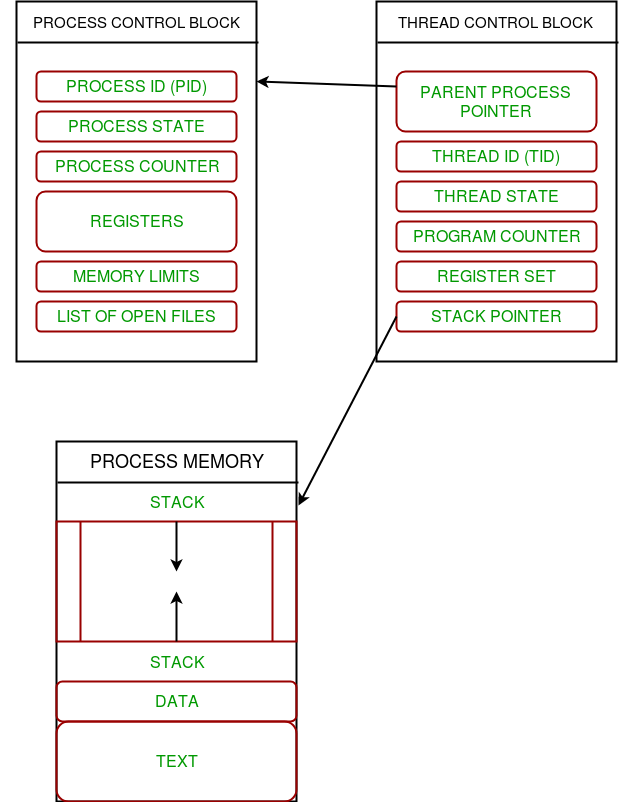

Multiple threads can exist within one process where:

*   Each thread contains its own register set and local variables (stored in stack).

*   All thread of a process share global variables (stored in heap) and the program code.

Consider the diagram below to understand how multiple threads exist in memory:

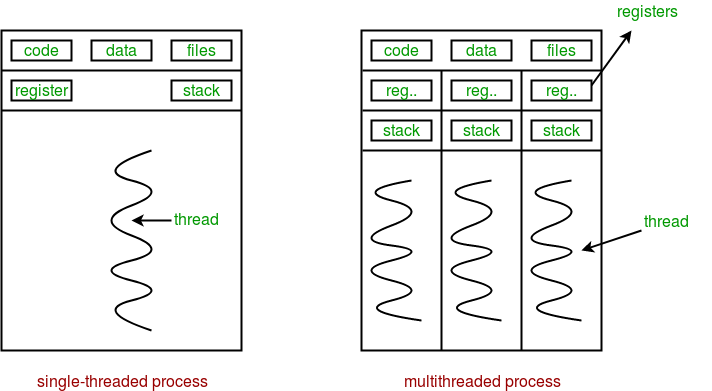

### **Multithreading**

**Multithreading** is defined as the ability of a processor to execute multiple threads concurrently.

*`In a simple, single-core CPU, it is achieved using frequent switching between threads. This is termed as context switching. In context switching, the state of a thread is saved and state of another thread is loaded whenever any interrupt (due to I/O or manually set) takes place. Context switching takes place so frequently that all the threads appear to be running parallelly (this is termed as multitasking).`*

Consider the diagram below in which a process contains two active threads:

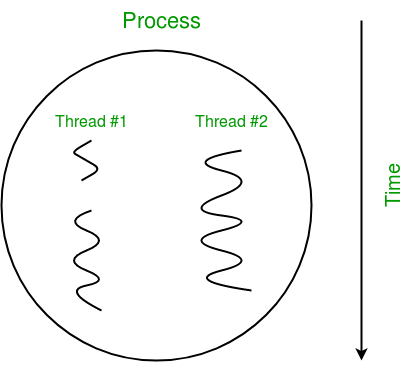

In Python, the threading module provides a very simple and intuitive API for spawning multiple threads in a program.

Let us consider a simple example using threading module:

In [ ]:
# Python program to illustrate the concept
# of threading
# importing the threading module
import threading

def print_cube(num):
	"""
	function to print cube of given num
	"""
	print("\nCube: {}".format(num * num * num))

def print_square(num):
	"""
	function to print square of given num
	"""
	print("\nSquare: {}".format(num * num))

if __name__ == "__main__":
	# creating thread
	t1 = threading.Thread(target=print_square, args=(10,))
	t2 = threading.Thread(target=print_cube, args=(10,))

	# starting thread 1
	t1.start()
	# starting thread 2
	t2.start()

	# wait until thread 1 is completely executed
	t1.join()
	# wait until thread 2 is completely executed
	t2.join()

	# both threads completely executed
	print("\nDone!")


Square: 100

Cube: 1000

Done!


  Let us try to understand the above code:

  To import the threading module, we do:

`import threading`

  To create a new thread, we create an object of Thread class. It takes following arguments:

*  **target:** the function to be executed by thread
*  **args:** the arguments to be passed to the target function

  In above example, we created 2 threads with different target functions:

```
t1 = threading.Thread(target=print_square, args=(10,))
t2 = threading.Thread(target=print_cube, args=(10,))
```

  To start a thread, we use start method of Thread class.

```
t1.start()
t2.start()
```

  Once the threads start, the current program (you can think of it like a main thread) also keeps on executing. In order to stop execution of current program until a thread is complete, we use join method.

```
t1.join()
t2.join()
```

  As a result, the current program will first wait for the completion of t1 and then t2. Once, they are finished, the remaining statements of current program are executed.

  Consider the diagram below for a better understanding of how above program works:

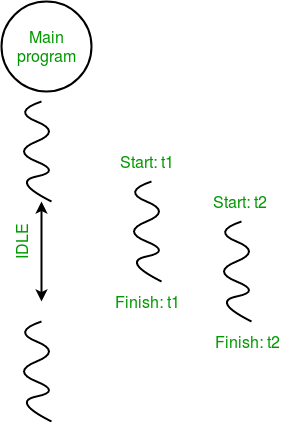

Consider the python program given below in which we print thread name and corresponding process for each task:

In [ ]:
# Python program to illustrate the concept
# of threading
import threading
import os

def task1():
	print("\nTask 1 assigned to thread: {}".format(threading.current_thread().name))
	print("\nID of process running task 1: {}".format(os.getpid()))

def task2():
	print("\nTask 2 assigned to thread: {}".format(threading.current_thread().name))
	print("\nID of process running task 2: {}".format(os.getpid()))

if __name__ == "__main__":

	# print ID of current process
	print("\nID of process running main program: {}".format(os.getpid()))

	# print name of main thread
	print("\nMain thread name: {}".format(threading.current_thread().name))

	# creating threads
	t1 = threading.Thread(target=task1, name='t1')
	t2 = threading.Thread(target=task2, name='t2')

	# starting threads
	t1.start()
	t2.start()

	# wait until all threads finish
	t1.join()
	t2.join()



ID of process running main program: 59

Main thread name: MainThread

Task 1 assigned to thread: t1

ID of process running task 1: 59

Task 2 assigned to thread: t2

ID of process running task 2: 59


  Let us try to understand the above code:

  We use os.getpid() function to get ID of current process.

`print("ID of process running main program: {}".format(os.getpid()))`

  As it is clear from the output, the process ID remains same for all threads.

  We use threading.main_thread() function to get the main thread object. In normal conditions, the main thread is the thread from which the Python interpreter was started. name attribute of thread object is used to get the name of thread.

`print("Main thread name: {}".format(threading.main_thread().name))`

  We use the threading.current_thread() function to get the current thread object.

`print("Task 1 assigned to thread: {}".format(threading.current_thread().name))`

The diagram given below clears the above concept:

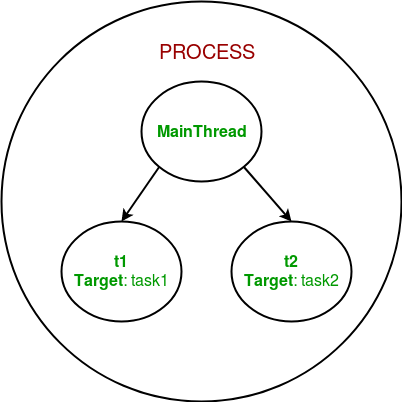

Threading is like making breakfast

Let’s make some breakfast: we’ll need a boiled egg, some toast and a cup of coffee so we have 4 tasks:

*  toast bread
*  boil water
*  boil egg
*  switch on the coffee maker

  How would you go about this?

  One way is to perform each task sequentially; first toast bread, then boil water and an egg an then switch on the coffee maker. Although this process is pretty understandable, in the end it just leaves us with some cold toast, a cold egg and a hot cup of coffee. Alternatively we could perform some tasks simultaneously; we’ll switch on the coffee maker and toaster and boil some water at the same time.

  Let’s simulate this with some code.

In [7]:
import time

def toast_bread():
    print("\ntoasting bread..")
    time.sleep(8)
    print("\nbread toasted")

def make_some_coffee():
    print("\nturned on coffee maker..")
    time.sleep(4)
    print("\nPoured a nice cup of coffee")

def boil_water_and_egg():
    print("\nboiling water..")
    time.sleep(5.5)
    print("\nwater boiled")

We’ll run this code sequentially (one after the other) like this:



In [8]:
toast_bread()
boil_water_and_egg()
make_some_coffee()


toasting bread..

bread toasted

boiling water..

water boiled

turned on coffee maker..

Poured a nice cup of coffee


Making breakfast sequentially will take around 17.5 seconds. This involves a lot of waiting!

Let’s multitask using threads:

In [10]:
from threading import Thread

threadlist = []

threadlist.append(Thread(target=toast_bread))
threadlist.append(Thread(target=boil_water_and_egg))
threadlist.append(Thread(target=make_some_coffee))

for t in threadlist:
  t.start()

for t in threadlist:
  t.join()


toasting bread..

boiling water..
turned on coffee maker..


Poured a nice cup of coffee

water boiled

bread toasted


The code is pretty straight-forward: we’ll create some tasks and append all of them to a list. Then we’ll start each thread in the list and wait for all of them to finish (this is what t.join() does).

Making breakfast concurrently takes around 8 seconds!

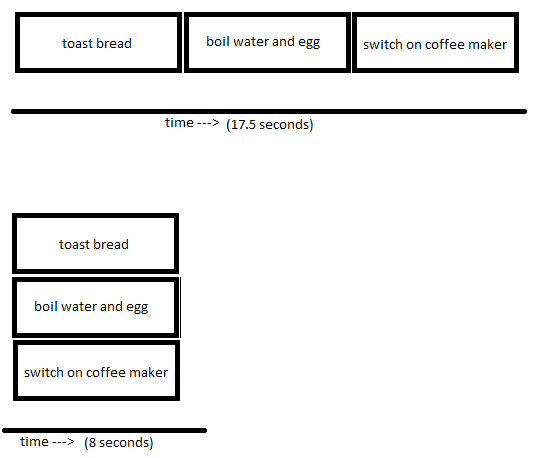

  The main take-away is that if there’s a lot of waiting involved (typical in I/O tasks like downloading data, API requests, writing files..)
  
  we can use threads to multi-task. Later on in this article we’ll examine why threads are the best option for I/O-tasks.

#**Student's Task**

##**Multithreading**

In [ ]:
# A Python program to demonstrate working of Multi-Threading.

import time
import threading


def calc_square(numbers):
    print("\nCalculate square numbers: ")
    for i in numbers:
        time.sleep(2)  # artificial time-delay
        print('\nsquare: ', str(i * i))


def calc_cube(numbers):
    print("\nCalculate cube numbers: ")
    for i in numbers:
        time.sleep(2)
        print('\ncube: ', str(i * i * i))


if __name__ == "__main__":
    arr = [2, 3, 8, 9]
    t1 = threading.Thread(target=calc_square, args=(arr,))
    t2 = threading.Thread(target=calc_cube, args=(arr,))
    # creating two threads here t1 & t2
    t1.start()
    t2.start()
    # starting threads here parallel by using start function.
    t1.join()
    # this join() will wait until the cal_square() function is finished.
    t2.join()
    # this join() will wait unit the cal_cube() function is finished.
    print("\nSuccesses!")


Calculate square numbers: 

Calculate cube numbers: 

square:  4

cube:  8

cube:  27

square:  9

cube:  512

square:  64

cube:  729

square:  81

Successes!
